# Three-armed Bayesian Bernoulli Bandits


65


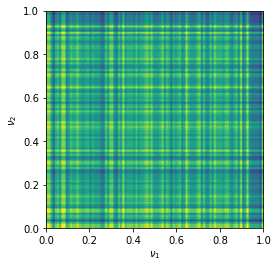

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement as Comb_rep
K = 2       # No. Arms ()
gamma = 0.9 # Discount Factor
eps = 1e-3  # Precision of the approximation
T = int(np.log(eps)/np.log(gamma))
print(T)
def belief_state(B):
  Nbins = 100
  nu = [None]*K
  for i, (a, b) in enumerate(B):
    nu[i] = beta(a, b).pdf
  coords = np.meshgrid(*[np.linspace(0, 1, Nbins)]*K)
  S = nu[0](coords[0])
  for i, x in enumerate(coords[1:]):
    S *= nu[i](x)
  S = S.reshape(*[Nbins]*K)[::-1,:]
  if len(B) == 2:
    extent = [0, 1, 0, 1]
    plt.xlabel("$\\nu_1$")
    plt.ylabel("$\\nu_2$")
    plt.imshow(S, extent=extent)
    plt.show()
  return

belief_state([(1, 1), (1, 1)])

In [2]:
def states(N):
  if N == 0:
    S = np.array(list(partitions(N, K*2))) + np.ones(K*2, dtype=int)
    return [tuple([(S[2*j], S[2*j + 1]) for j in range(K)])]
  return [tuple([(i[2*j], i[2*j + 1]) for j in range(K)])
          for i in np.array(list(partitions(N, K*2))) + np.ones(K*2)]
def partitions(n, b):
  masks = np.identity(b, dtype=int)
  for c in Comb_rep(masks, n):
    yield sum(c)
states(3)

[((4.0, 1.0), (1.0, 1.0)),
 ((3.0, 2.0), (1.0, 1.0)),
 ((3.0, 1.0), (2.0, 1.0)),
 ((3.0, 1.0), (1.0, 2.0)),
 ((2.0, 3.0), (1.0, 1.0)),
 ((2.0, 2.0), (2.0, 1.0)),
 ((2.0, 2.0), (1.0, 2.0)),
 ((2.0, 1.0), (3.0, 1.0)),
 ((2.0, 1.0), (2.0, 2.0)),
 ((2.0, 1.0), (1.0, 3.0)),
 ((1.0, 4.0), (1.0, 1.0)),
 ((1.0, 3.0), (2.0, 1.0)),
 ((1.0, 3.0), (1.0, 2.0)),
 ((1.0, 2.0), (3.0, 1.0)),
 ((1.0, 2.0), (2.0, 2.0)),
 ((1.0, 2.0), (1.0, 3.0)),
 ((1.0, 1.0), (4.0, 1.0)),
 ((1.0, 1.0), (3.0, 2.0)),
 ((1.0, 1.0), (2.0, 3.0)),
 ((1.0, 1.0), (1.0, 4.0))]

In [3]:
Values = dict()
for state in states(T):
  q = [state[i][0]/np.sum(state[i]) for i in range(K)]
  Values[state] = (max(q)/(1 - gamma), np.argmax(q))

def compute_value(state):
  w = [state[i][0]/np.sum(state[i]) for i in range(K)]
  Q = [w[i]*(1 + gamma*Values[tuple([(state[j][0] + int(j == i), state[j][1])
                               for j in range(K)])][0]) + \
       (1 - w[i])*gamma*Values[tuple([(state[j][0], state[j][1] + int(j == i))
                                for j in range(K)])][0]
       for i in range(K)]
  return (max(Q), np.argmax(Q))

for t in range(T)[::-1]:
  for state in states(t):
    Values[state] = compute_value(state)

In [10]:
s2 = (6, 6)
V_mat = -np.ones((2, T, T))
for s in range(1, T):
  for f in range(1, T):
    if s + f + np.sum(s2) - 4 <= T:
      V_mat[:, s, f] = Values[((s, f), s2)]
values_mat = np.ma.masked_where(V_mat[0] == -1, V_mat[0])
best_a_mat = np.ma.masked_where(V_mat[1] == -1, V_mat[1])

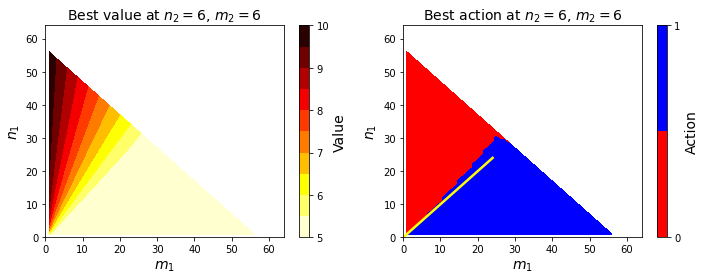

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.set_title('Best value at $n_2=${}, $m_2=${}'.format(*s2), fontsize=14)
ax1.set_xlabel('$m_1$', fontsize=14)
ax1.set_ylabel('$n_1$', fontsize=14)
im = ax1.contourf(values_mat, cmap='hot_r', levels=10)
bar = fig.colorbar(im, ax=ax1)
bar.set_label('Value', fontsize=14)

ax2.set_title('Best action at $n_2=${}, $m_2=${}'.format(*s2), fontsize=14)
ax2.set_xlabel('$m_1$', fontsize=14)
ax2.set_ylabel('$n_1$', fontsize=14)
cs = ax2.contourf(best_a_mat, levels=1, colors=['r','b'])
bar = fig.colorbar(cs, ax=ax2)
bar.set_label('Action', fontsize=14)
bar.set_ticks([0,1])


x = np.arange(25)
y = np.arange(25)
ax2.plot(x,y, linewidth=2.5, c="yellow")
plt.gcf().set_facecolor('white')

plt.tight_layout()

State: ((1, 1), (1, 1)), Arm: 0, Reward: Win


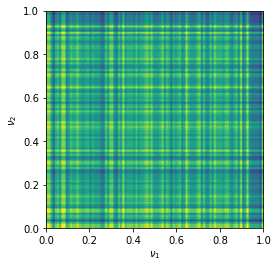

State: ((6, 1), (1, 1)), Arm: 0, Reward: Win


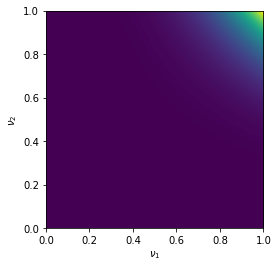

State: ((11, 1), (1, 1)), Arm: 0, Reward: Win


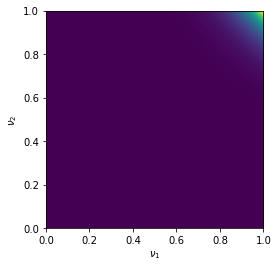

State: ((16, 1), (1, 1)), Arm: 0, Reward: Fail


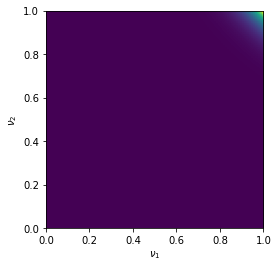

State: ((20, 2), (1, 1)), Arm: 0, Reward: Fail


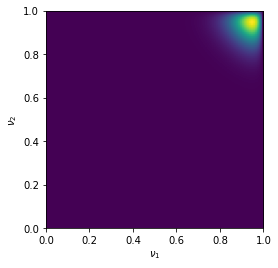

State: ((23, 4), (1, 1)), Arm: 0, Reward: Fail


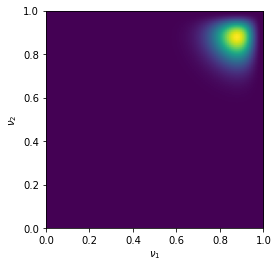

State: ((26, 6), (1, 1)), Arm: 0, Reward: Win


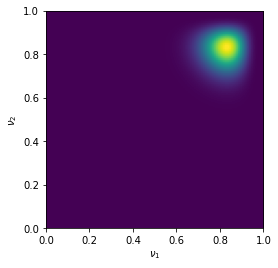

State: ((30, 7), (1, 1)), Arm: 0, Reward: Win


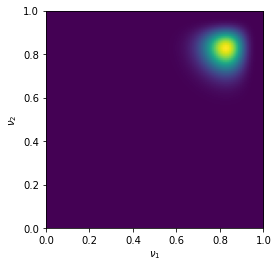

State: ((35, 7), (1, 1)), Arm: 0, Reward: Win


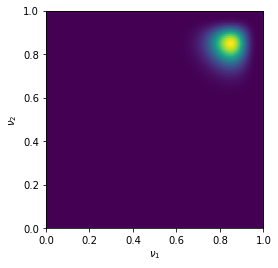

State: ((40, 7), (1, 1)), Arm: 0, Reward: Win


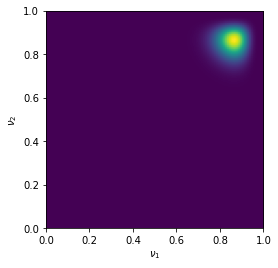

State: ((45, 7), (1, 1)), Arm: 0, Reward: Win


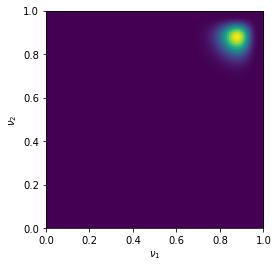

State: ((49, 8), (1, 1)), Arm: 0, Reward: Win


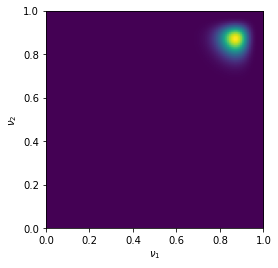

State: ((54, 8), (1, 1)), Arm: 0, Reward: Fail


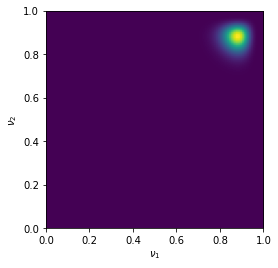

In [15]:
state = [[1, 1], [1, 1]]
rho = (0.9, 0.8)
str_res = ("Fail", "Win")
step = 5
for i in range(T - 1):
  s = tuple([tuple(state[i]) for i in range(K)])
  res = np.random.binomial(1, rho[Values[s][1]])
  if (i % step == 0):
    print(f"State: {s}, Arm: {Values[s][1]}, Reward: {str_res[res]}")
    belief_state(s)
  state[Values[s][1]][int(res != 1)] += 1